<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/16_stock_prediction_using_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK PREDICTION USING LSTM MODEL**

IMPORT LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

LOAD THE DATASET

+ The data is the Stock Data of the Compay StarBucks
+ The data is from `Feb - 2013 to Feb - 2018`
+ 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


DOING THE STOCK PREDICTION.

+ trying to predict the price itself

In [7]:
series = df["close"].values.reshape(-1,1)
print(series)
# print(len(series))
# print(len(series)//2)
# print(series[:len(series)//2])

[[28.185]
 [28.07 ]
 [28.13 ]
 ...
 [54.69 ]
 [55.61 ]
 [54.46 ]]


In [8]:
## normalize the data
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()
print(series)

[-1.62500489 -1.64174953 -1.6330132  ...  2.2342704   2.36822751
  2.20078112]


BUILD THE DATASET

In [9]:
## see if we can use T past values to predict the next value.
T = 10
D = 1
X = []
Y = []

## populate the X and Y lists.
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1) ## now the data should be NxTxD
Y = np.array(Y)
N = len(X)

print("X.shape :-", X.shape, "Y.shape :-", Y.shape)

X.shape :- (1249, 10, 1) Y.shape :- (1249,)


BUILD THE MODEL

In [10]:
i = Input(shape = (T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


COMPILE THE MODEL

In [11]:
model.compile(
    loss = "mse",
    optimizer = Adam(learning_rate = 0.01)
)

TRAIN THE MODEL

In [13]:
r = model.fit(
    X[:-N//2], Y[:-N//2],
    validation_data = (X[-N//2:], Y[-N//2:]),
    epochs = 100
)

Epoch 1/100
20/20 [==============================] - 1s 27ms/step - loss: 0.1104 - val_loss: 0.8383
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0384 - val_loss: 0.4090
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0145 - val_loss: 0.1434
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0092 - val_loss: 0.0810
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0075 - val_loss: 0.0712
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0073 - val_loss: 0.0608
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0071 - val_loss: 0.0573
Epoch 8/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0070 - val_loss: 0.0613
Epoch 9/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0068 - val_loss: 0.0541
Epoch 10/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0068 - val_loss: 0.0568
Epoc

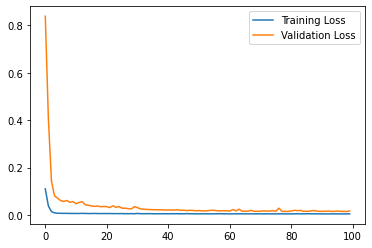

In [14]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

Loss is Decreasing, So the LSTM network is doing good.

DOING THE ONE-STEP FORECAST

40/40 [==============================] - 1s 3ms/step
(1249, 1)


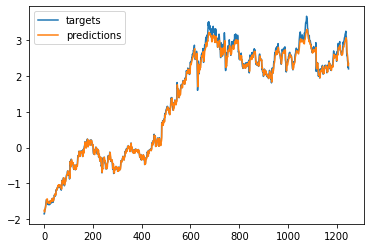

In [15]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = "targets")
plt.plot(predictions, label = "predictions")
plt.legend();
plt.show();

Here we are getting almost Perfect Predictions.

DOING THE MULTI-STEP FORECAST

1/1 [==============================] - 0s 40ms/step


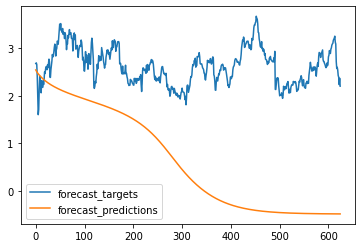

In [18]:
validation_target = Y[-N//2:]
validation_predictions = []

## last train input
last_x = X[-N//2]  ## 1D array of length T.

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]
  ## update the prediction list.
  validation_predictions.append(p)
  ## make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label = "forecast_targets")
plt.plot(validation_predictions, label = "forecast_predictions")
plt.legend();
plt.show();

Here looking at the Predictions, it is actually very bad in Predicting the Future Price.

+ Even though the real price is moving up and down.
+ The predictions is always perform worse.